#### CSE 452: Neural Networks and Fuzzy Systems Lab
Summer-2020, Dept. of CSE, NEUB <br>

#### Student Info
<b>Name:</b> Gulam Kibria Chowdhury<br>
<b>Reg. No:</b> 170103020033

### Assignment 5: Fully Connected Layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix ,  accuracy_score
from sklearn import datasets
import math

<b>Toy data</b>

In [2]:
X=np.array([[1, 2], [4, 5], [12, 7], [16, 10], [20, 5], [5, 8]  ])
y=np.array([[0,1], [0,1], [1,0], [1,0],  [0,1], [1,0] ])
print(X.shape, y.shape)

(6, 2) (6, 2)


In [3]:
print(y)

[[0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


<b>Softmax</b>
$$Let, a=[a_0, a_1, a_2, ..]$$
$$S_i=\frac{e^{a_i}}{\sum_{k=0}^{N} {e^{a_k}}}$$

<b>Task 1: Implement Softmax</b> <br>
1. Implement both ways: Using loop and Without using loop. <br>
2. What challanges did you face?
3. Check output manually.

In [4]:
z=np.array( [ [1.2, 1.6], [2.4, 3.4],  [3.8, 5.8],  [5.1, 7.8],  [4. , 6.6],   [3.4, 4.8]])
print(z)

[[1.2 1.6]
 [2.4 3.4]
 [3.8 5.8]
 [5.1 7.8]
 [4.  6.6]
 [3.4 4.8]]


## Implement Softmax Using loop.......... 

In [5]:
#your code goes here.
#a=softmax(z)

#Using loop.......... 
def sig(a):
    dd=math.exp(a[0])+math.exp(a[1])
    return [math.exp(a[0])/dd,math.exp(a[1])/dd];

A=[]
for i in z:
    A.append(sig(i))
    
A=np.array(A)
print(A)

[[0.40131234 0.59868766]
 [0.26894142 0.73105858]
 [0.11920292 0.88079708]
 [0.06297336 0.93702664]
 [0.06913842 0.93086158]
 [0.19781611 0.80218389]]


## Implement Softmax Without using loop.......

In [6]:
zz=np.transpose(z)
e_x = np.exp(zz - np.max(zz))
A=e_x / e_x.sum(axis=0)
A=np.transpose(A)

print(A) 

[[0.40131234 0.59868766]
 [0.26894142 0.73105858]
 [0.11920292 0.88079708]
 [0.06297336 0.93702664]
 [0.06913842 0.93086158]
 [0.19781611 0.80218389]]


# Task_1 complete ..................

<b>Task 2: calculate feedforward output</b><br><br>
$A=softmax(X.w+b)$

Output should look like the following. <br>

[[0.401 0.599] <br>
 [0.269 0.731] <br>
 [0.119 0.881] <br>
 [0.063 0.937] <br>
 [0.069 0.931] <br>
 [0.198 0.802]]

In [7]:
b=np.array([0.5, 0.6])
w=np.array([ [0.1,0.2], [0.3,0.4] ])

In [8]:
#your code goes here.

z=np.dot(X,w)+b

zz=np.transpose(z)
e_x = np.exp(zz - np.max(zz))
A=e_x / e_x.sum(axis=0)
A=np.transpose(A)

print(A)

[[0.40131234 0.59868766]
 [0.26894142 0.73105858]
 [0.11920292 0.88079708]
 [0.06297336 0.93702664]
 [0.06913842 0.93086158]
 [0.19781611 0.80218389]]


# Task_2 complete ..................

<b>Task 3: calculate log loss</b><br><br> 
Note: <b>without using any loop.</b> <br>
$$L_i = - y_i* \sum \log (A_i)$$
\begin{equation*}
L =\frac{1}{N} \sum_i L_i 
\end{equation*}

Output should look like the following. <br>
Loss: [0.513 0.313 2.127 2.765 0.072 1.62 ] <br>
average loss: 1.2351

In [9]:
#your code goes here.

loss=-np.sum( y*np.log(A) , axis=1)
print("loss         :->",loss)

print("average loss :->",np.sum(loss)/len(loss))


loss         :-> [0.51301525 0.31326169 2.12692801 2.76504356 0.07164469 1.62041741]
average loss :-> 1.2350517691039766


# Task_3 complete ..................

<b>Task 4: calculate gradient</b><br>
Note: <b>calculate dz, dw, db without using loop</b> </br>
$$dz=A-y$$ 
$$dw=\frac{1}{N} ( X^T.dz )$$   
$$db=\frac{1}{N} \sum dz $$ 

Dimension check: y-yh= (2xN).(NX2)=(2x2) 

dw should look like below, <br>
[[-4.452,  4.452], <br>
[-3.243,  3.243]])

db should look like below<br>
[[-0.313,  0.313]]

In [10]:
#your code goes here.
dz=A-y
print("DZ------>")
print(dz) 

print("\nDW------>")
dw=np.dot(np.transpose(X),dz)
print(dw/len(dz))

print("\nDZ------->")
db=sum(dz)/len(dz)
print(db)

DZ------>
[[ 0.40131234 -0.40131234]
 [ 0.26894142 -0.26894142]
 [-0.88079708  0.88079708]
 [-0.93702664  0.93702664]
 [ 0.06913842 -0.06913842]
 [-0.80218389  0.80218389]]

DW------>
[[-4.45217737  4.45217737]
 [-3.2433822   3.2433822 ]]

DZ------->
[-0.3134359  0.3134359]


# Task_4 complete ..................

<b>Task 5: Train the network using gradient descent optimization</b>

In [11]:
lr=0.01
epoch=1000

In [12]:
#init w and b randomly.
D=X.shape[1]
C=y.shape[1]
w = 0.01 * np.random.randn(D,C)
b = np.zeros((1,C))

 1. Init w and b randomly
 2. repeat the following
     3. calculate feedforward output
     4. calculate gradient
     5. update w and b (w=w-lr\*dw,  b=b-lr*db)
     6. calculate loss and keep track.

7. After training plot the loss
8. test prediction on the X data

In [13]:
#your code goes here.

all_loss=[]
while(epoch):
    epoch-=1
    z=np.dot(X,w)+b
    
    zz=np.transpose(z)
    e_x = np.exp(zz - np.max(zz))
    A=e_x / e_x.sum(axis=0)
    A=np.transpose(A)
    
    dz=A-y
    dw=np.dot(np.transpose(X),dz)
    dw=dw/len(dz)
    db=sum(dz)/len(dz)
    
    w=w-lr*dw
    b=b-lr*db
    
    loss=-np.sum( y*np.log(A) , axis=1)
    avg_los=np.sum(loss)/len(loss)
    all_loss.append(avg_los)

print("Weights\n ",w)
print("\nbias \n", b) 


Weights
  [[-0.04898945  0.06087997]
 [ 0.2864857  -0.29434598]]

bias 
 [[-1.04390841  1.04390841]]


plot the loss


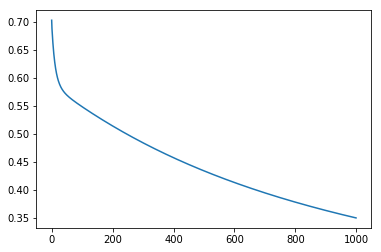

In [14]:
#print(all_loss)
print("plot the loss")
plt.plot(all_loss)
plt.show()

### Prediction on the X data

In [15]:
z=np.dot(X,w)+b

zz=np.transpose(z)
e_x = np.exp(zz - np.max(zz))
A=e_x / e_x.sum(axis=0)
A=np.transpose(A)

print(A)

[[0.26191811 0.73808189]
 [0.59311649 0.40688351]
 [0.6591642  0.3408358 ]
 [0.87681289 0.12318711]
 [0.20084091 0.79915909]
 [0.88178982 0.11821018]]


In [16]:
k=0
for i in A:
    idx=i.tolist().index(max(i))
    A[k]=([0 if j!=idx else 1 for j in range(len(i))])
    k+=1


print("predicted \n",A)
print()
print("Original \n",y)

cunt=0
for i,j in zip(A,y):
    result= i==j
    #print(result)
    if(all(result)):
        cunt+=1

#print(cunt)
print()
print("Accuracy :-> ",(cunt/len(y))*100,"%")


predicted 
 [[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]

Original 
 [[0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]

Accuracy :->  83.33333333333334 %


# Task_5 complete ..................

<b>Digits Data</b>

In [17]:
datas=datasets.load_digits()
data=datas['data']
label=datas['target'] 

In [18]:
X,X_test, y, y_test=train_test_split(data, label, test_size = 0.2)
print('Training shape:', X.shape, y.shape)
print('Testing shape:',X_test.shape, y_test.shape)

Training shape: (1437, 64) (1437,)
Testing shape: (360, 64) (360,)


In [19]:
N,D=X.shape            #num_data, data_dimension
C=np.max(y)+1          #number of classes
print(N,D)

1437 64


In [20]:
C

10

In [21]:
y

array([9, 2, 3, ..., 9, 1, 6])

<b>Task 6: Train on the digits data [Note: y is not one-hot vector now]</b>
1. Train a two layer[Input, Output] network
2. Plot loss, tune learning rate, number of epochs
3. predict on test data and show accuracy.  [accuracy should be above 90%]
4. Play with the learning rate and number of epochs [try few values]

In [22]:
#your code goes here.
#init w and b randomly.
w = 0.01 * np.random.randn(D,C)
b = np.zeros((1,C))

#print(w)
#print(b)

y_onehot=np.zeros((N, C))
y_onehot[ range(N), y]=1
print("y_onehot",y_onehot)

N,D=X_test.shape 
y_test_onehot=np.zeros((N, C))
y_test_onehot[ range(N), y_test]=1
print("\ny_test_onehot\n",y_test_onehot)




y_onehot [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

y_test_onehot
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [23]:
lr=0.01
epoch=1000


all_loss=[]
while(epoch):
    epoch-=1
    z=np.dot(X,w)+b
    
    zz=np.transpose(z)
    e_x = np.exp(zz - np.max(zz))
    A=e_x / e_x.sum(axis=0)
    A=np.transpose(A)
    
    dz=A-y_onehot
    dw=np.dot(np.transpose(X),dz)
    dw=dw/len(dz)
    db=sum(dz)/len(dz)
    
    w=w-lr*dw
    b=b-lr*db
    
    loss=-np.sum( y_onehot*np.log(A) , axis=1)
    avg_los=np.sum(loss)/len(loss)
    all_loss.append(avg_los)

print("Weights\n ",w)
print("\nbias \n", b) 


Weights
  [[-9.99084785e-03 -4.76077457e-03 -6.49696705e-03  8.75355327e-03
   8.08828658e-03  7.38613175e-03 -1.45654257e-02 -1.25935565e-02
   1.71898377e-02  1.13627148e-02]
 [-1.10169786e-02 -1.88669332e-02  4.66598591e-03  8.92424818e-03
  -1.94253445e-02  2.90837526e-02  6.20091266e-03  1.58263122e-02
  -1.77300924e-02 -2.44110345e-02]
 [-5.98900278e-03 -5.53984457e-02  3.73215349e-02 -2.98063023e-02
  -7.47413716e-02  1.64552095e-01 -8.17669359e-02  3.08094248e-02
  -4.47717317e-03 -2.20690346e-02]
 [ 4.61600490e-02  2.01654043e-02  2.38376054e-02  5.76232997e-02
  -1.12192396e-01 -1.22532106e-02 -4.95799851e-02  6.29335196e-02
  -8.30046924e-02  7.97760538e-02]
 [-6.44636602e-03 -2.39727638e-01  1.52570794e-02  1.66473351e-01
  -5.05295998e-02  1.03696999e-02 -3.50358287e-02  8.28126493e-02
   1.57647921e-02  3.51214441e-02]
 [-7.63773882e-02  1.11397785e-01 -3.78121519e-02  8.07040020e-02
  -1.46658765e-01  1.50943037e-01 -5.15719039e-02  5.25152227e-02
  -3.12152945e-02 -4.64

plot the loss


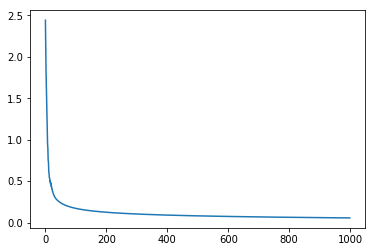

In [24]:
#print(all_loss)
print("plot the loss")
plt.plot(all_loss)
plt.show()

### Prediction on the X_test data

In [25]:
z=np.dot(X_test,w)+b

zz=np.transpose(z)
e_x = np.exp(zz - np.max(zz))
A=e_x / e_x.sum(axis=0)
A=np.transpose(A)

print(A)

[[1.76926266e-07 1.96883952e-02 1.10465014e-08 ... 2.53359147e-05
  1.19767154e-04 2.54266476e-08]
 [3.95607315e-07 9.73633708e-01 3.47777928e-04 ... 4.72850596e-05
  7.87008384e-03 1.58287234e-03]
 [1.44426736e-07 1.88382881e-04 3.17300051e-10 ... 2.88676306e-05
  6.68667173e-07 5.05250865e-10]
 ...
 [3.56064673e-08 1.07337774e-06 6.85390351e-05 ... 9.99892733e-01
  3.39829604e-06 1.02377977e-06]
 [9.99100896e-01 6.32068574e-07 5.53166121e-05 ... 2.71691744e-05
  5.63328621e-04 1.68269349e-04]
 [1.59647267e-05 3.55870999e-03 9.94917338e-01 ... 2.94648906e-04
  9.55111651e-04 3.07630411e-08]]


In [26]:
k=0
for i in A:
    idx=i.tolist().index(max(i))
    A[k]=([0 if j!=idx else 1 for j in range(len(i))])
    k+=1


print("predicted \n",A)
print()
print("Original \n",y_test_onehot)

cunt=0
for i,j in zip(A,y_test_onehot):
    result= i==j
    #print(result)
    if(all(result)):
        cunt+=1

#print(cunt)
print()
print("Accuracy :-> ",(cunt/len(y_test_onehot))*100,"%")

predicted 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]

Original 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]

Accuracy :->  98.33333333333333 %


# Task_6 complete ..................